# <font color = orange>US based Surprise Housing company to enter australian market</font>

## <font color = blue>Index:</font>

- [Problem Statement](#Problem-Statement)
- [Step1: Data Sourcing](#Step-1:-Data-Sourcing)
    >[Dataset information analyis](#Dataset-information-analyis)<br/>
- [Step 2: EDA](#Step2-EDA)
    >[Treating missing values](#Treating-missing-values)<br/>
    >[Imputing null values for categorical columns](#Imputing-null-values-for-categorical-columns)<br/>
    >[Derived columns](#Derived-columns)<br/>
    >[Outliers correction](#Outliers-correction)
- [Step3: Preparing data for Linear Regression](#Step3:-Preparing-data-for-Linear-Regression)
    >[Dummy column creation](#Dummy-column-creation)<br/>
    >[Splitting Data into Training and Testing Sets](#Splitting-Data-into-Training-and-Testing-sets)<br/>
    >[Rescaling the features](#Rescaling-the-features)<br/>    
- [Step4: Linear Regression Model Building](#Step4:-Linear-Regression-Model-Building)
    >[Build initial model using RFE](#Build initial-model-using-RFE)<br/>
    >[Build model using stats model](#Build-model-using-stats-model)<br/>
    >[Calculating Metrics for Linear regression model](#Calculating-Metrics-for-Linear-regression-model)<br/>
- [Step5: Ridge and Lasso Regression](#Step5:-Ridge-and-Lasso-Regression)
    >[Ridge Regression](#Ridge-Regression)<br/>
    >[Calculating Metrics for Ridge regression model](#Calculating-Metrics-for-Ridge-regression-model)<br/>
    >[Lasso Regression](#Lasso-Regression)<br/>
    >[Calculating Metrics for Lasso regression model](#Calculating-Metrics-for-Lasso-regression-model)<br/>
- [Conclusion](#Conclusion)

## <font color = blue>Problem Statement</font>
A US-based housing company named Surprise Housing has decided to enter the Australian market.The company is looking at prospective properties to buy to enter the market. We need to build a regression model using regularisation in order to predict the actual value of the prospective properties so that the company can decide to invest or not. The company wants to know:
- Which variables are significant in predicting the price of a house.
- How well those variables describe the price of a house. 

## <font color = blue>Step 1: Data Sourcing</font>
- Data is provided in a single csv file train.csv. in this section we will be loading using pandas and do some manual inspection

In [103]:
# import all libraries and dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

#importing libraries for regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#importing libraries for Ridge and Lasso regression
from sklearn import linear_model, metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings("ignore")

In [104]:
# Reading the loan.csv file on which analysis needs to be done

df = pd.read_csv("train.csv")

df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

###### Dataset information analyis
- Analysing dataset size and data types 
- Inthis dataset SalePrice is the traget variable which represents the price of the given property 

In [105]:
print(df.shape)

(1460, 81)


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [107]:
pd.set_option("display.max_columns",300)
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## <font color = blue>Step2-EDA</font>

###### Treating missing values
- Checking the percentage of missing values for each column
- imputing missing values

In [108]:
df["Fence"].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [109]:
#Calculating missing values %
df_null = df.isnull().mean().round(4)*100
df_null.sort_values(ascending=False).head(25)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Id               0.00
Functional       0.00
Fireplaces       0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
dtype: float64

In [110]:
#droping PoolQC,MiscFeature, Alley
df.drop(['Alley','PoolQC','MiscFeature'],axis=1,inplace = True)

In [111]:
df[df.duplicated()]
#No duplicate records found

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


###### Imputing null values for categorical columns

In [112]:
#df["PoolQC"].fillna("NA",inplace=True)
#df["MiscFeature"].fillna("NA",inplace=True)
#df["Alley"].fillna("NA",inplace=True)
df["Fence"].fillna("NA",inplace=True)
df["FireplaceQu"].fillna("NA",inplace=True)
df["GarageCond"].fillna("NA",inplace=True)
df["GarageType"].fillna("NA",inplace=True)
df["GarageFinish"].fillna("NA",inplace=True)
df["GarageQual"].fillna("NA",inplace=True)
df["BsmtFinType2"].fillna("NA",inplace=True)
df["BsmtExposure"].fillna("NA",inplace=True)
df["BsmtQual"].fillna("NA",inplace=True)
df["BsmtCond"].fillna("NA",inplace=True)
df["BsmtFinType1"].fillna("NA",inplace=True)
df["MasVnrType"].fillna("None",inplace=True)
df["Electrical"].fillna("NA",inplace=True)

In [113]:
#Calculating missing values %
df_null = df.isnull().mean().round(4)*100
df_null.sort_values(ascending=False).head(5)

LotFrontage     17.74
GarageYrBlt      5.55
MasVnrArea       0.55
Id               0.00
BedroomAbvGr     0.00
dtype: float64

imputing null values for non categorical columns

In [114]:
#imputing lot frontage with mode, this is of type float and mode makes sense for imputing
print(df["LotFrontage"].mode())
df["LotFrontage"].fillna(60,inplace=True)

#imputing GarageYrBlt to current year so that the garage duration will be calculated as 0
df["GarageYrBlt"].fillna(datetime.now().year,inplace=True)

#imputing MasVnrArea as 0 as the type is none
print(df[df["MasVnrArea"].isnull()][["MasVnrType","MasVnrArea"]])
df["MasVnrArea"].fillna(0,inplace=True)

0    60.0
Name: LotFrontage, dtype: float64
     MasVnrType  MasVnrArea
234        None         NaN
529        None         NaN
650        None         NaN
936        None         NaN
973        None         NaN
977        None         NaN
1243       None         NaN
1278       None         NaN


In [115]:
#check if all missing values are imputed
df_null = df.isnull().sum()
df_null.sort_values(ascending=False).head(25)

Id               0
HalfBath         0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
FullBath         0
GarageYrBlt      0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
GarageType       0
GarageFinish     0
MSSubClass       0
ScreenPorch      0
SaleCondition    0
SaleType         0
YrSold           0
dtype: int64

###### Derived columns

In [116]:
#converting years to ages as age will be more usefull for analysis
df["PropertyAge"] = datetime.now().year-df["YearBuilt"]
df["PropertyRemodelAge"] = datetime.now().year-df["YearRemodAdd"]
df["PropertyGarageAge"] = datetime.now().year-df["GarageYrBlt"].astype("int64")

#remove columns YearBuilt, YearRemodAdd, GarageYrBlt, Id

df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','Id'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1460 non-null   int64  
 1   MSZoning            1460 non-null   object 
 2   LotFrontage         1460 non-null   float64
 3   LotArea             1460 non-null   int64  
 4   Street              1460 non-null   object 
 5   LotShape            1460 non-null   object 
 6   LandContour         1460 non-null   object 
 7   Utilities           1460 non-null   object 
 8   LotConfig           1460 non-null   object 
 9   LandSlope           1460 non-null   object 
 10  Neighborhood        1460 non-null   object 
 11  Condition1          1460 non-null   object 
 12  Condition2          1460 non-null   object 
 13  BldgType            1460 non-null   object 
 14  HouseStyle          1460 non-null   object 
 15  OverallQual         1460 non-null   int64  
 16  Overal

In [117]:
#Identifying categorical and continous columns
pd.set_option("display.max_rows",300)
df.nunique()

MSSubClass              15
MSZoning                 5
LotFrontage            110
LotArea               1073
Street                   2
LotShape                 4
LandContour              4
Utilities                2
LotConfig                5
LandSlope                3
Neighborhood            25
Condition1               9
Condition2               8
BldgType                 5
HouseStyle               8
OverallQual             10
OverallCond              9
RoofStyle                6
RoofMatl                 8
Exterior1st             15
Exterior2nd             16
MasVnrType               4
MasVnrArea             327
ExterQual                4
ExterCond                5
Foundation               6
BsmtQual                 5
BsmtCond                 5
BsmtExposure             5
BsmtFinType1             7
BsmtFinSF1             637
BsmtFinType2             7
BsmtFinSF2             144
BsmtUnfSF              780
TotalBsmtSF            721
Heating                  6
HeatingQC                5
C

In [118]:

#dropped columns 'Alley','PoolQC','MiscFeature',

cols_categorical=['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl',
'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure',
'BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','Fence','MoSold','SaleType',
'SaleCondition','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
'Fireplaces','GarageCars']

cols_quantitative=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
'2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
'PoolArea','MiscVal','PropertyAge','PropertyRemodelAge','PropertyGarageAge']

print(f'Number of Categorical Columns:{len(cols_categorical)}')
print(f'Number of Quantitative Columns:{len(cols_quantitative)}')
print(f'Number of DF Columns including target variable:{len(df.columns)}')

Number of Categorical Columns:54
Number of Quantitative Columns:22
Number of DF Columns including target variable:77


In [119]:
#Convert all categorical columns into object data type 
df[cols_categorical] = df[cols_categorical].astype("object")
df[cols_categorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  OverallQual    1460 non-null   object
 14  OverallCond    1460 non-null   object
 15  RoofStyle      1460 non-null   object
 16  RoofMatl       1460 non-null   object
 17  Exterior1st    1460 non-null   object
 18  Exterior2nd    1460 non-null

###### Outliers correction
- Plotted Histograms for understanding distribution of Quantitative variables
- most of the quantitative variables have outliers, hence we need to treat all the outliers

array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>],
       [<Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>],
       [<Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'WoodDeckSF'}>,
        <Axes: title={'center': 'OpenPorchSF'}>,
        <Axes: title={'center': 'EnclosedPorch'}>],
       [<Axes: title={'center': '3SsnPorch'}>,
        <Axes: title={'center': 'ScreenPorch'}>,
        <Axes: title={'center': 'PoolArea'}>,
        <Axes: title={'center': 'MiscVal'}>,
        <Axes: title={'center': 'PropertyAge'}>],
       [<Axes: title={'center': 'Property

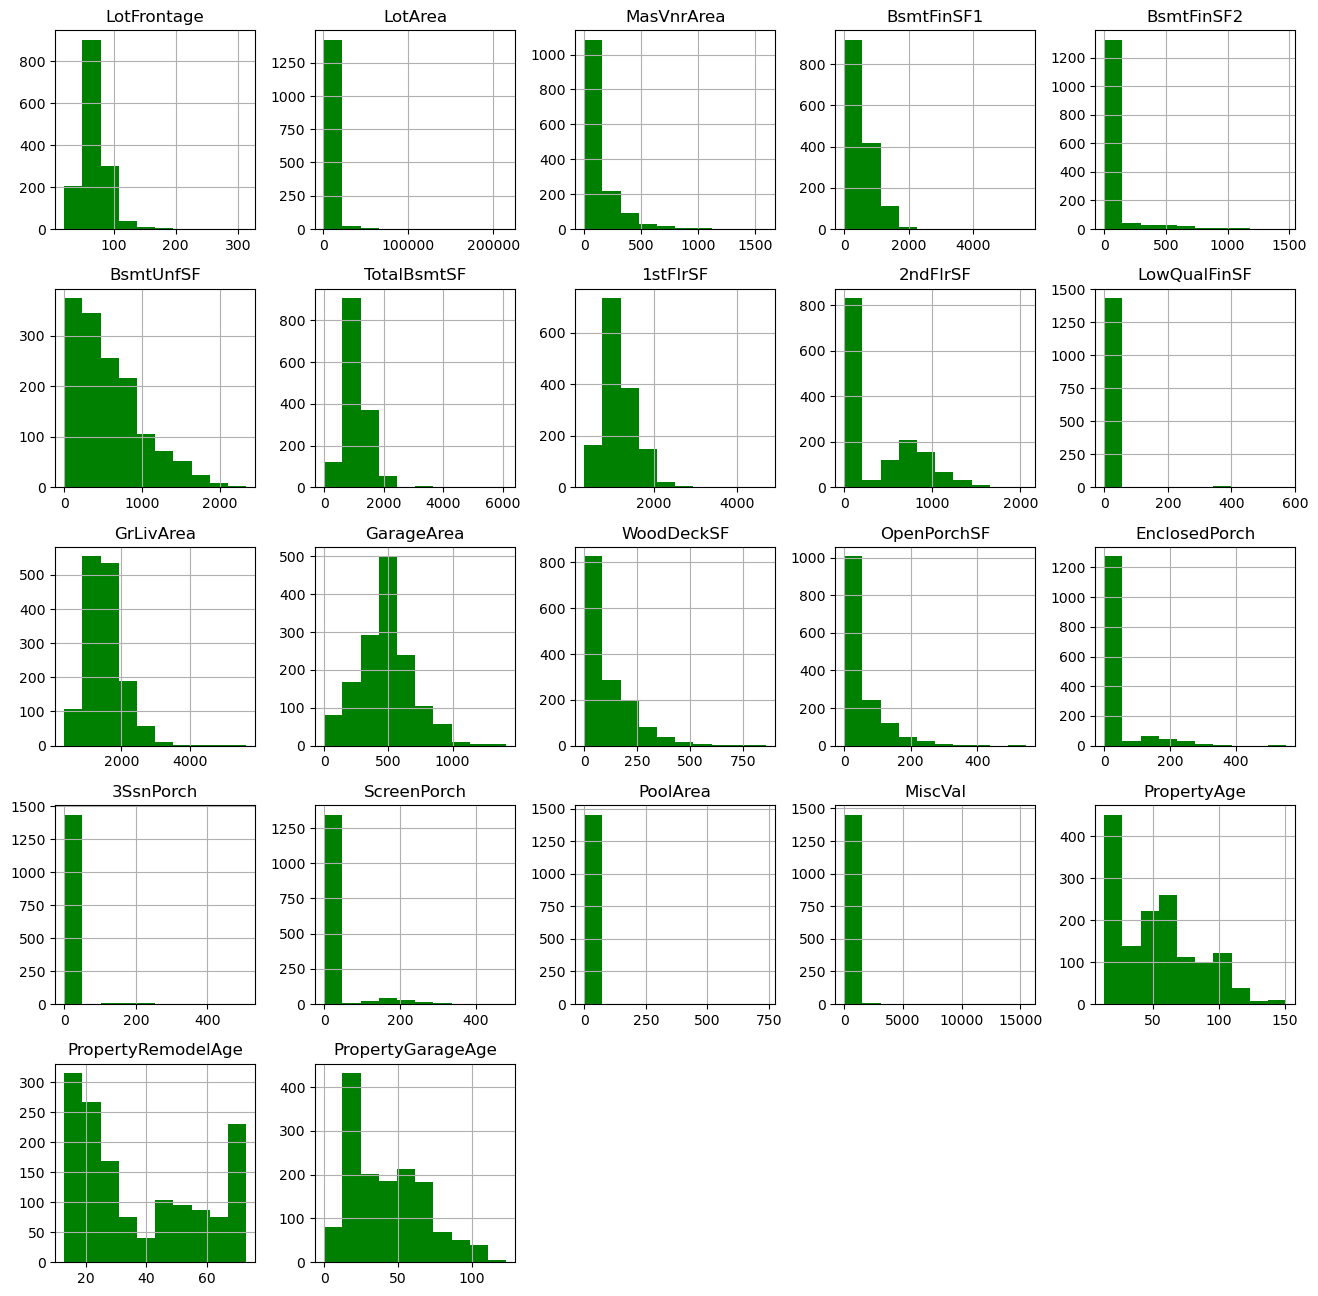

In [120]:
df[cols_quantitative].hist(layout=(5,5),figsize=(16,16),color='g')

In [121]:
#functiona for handling outliers
#Here we have considered 25th percentile as Q1 and 75th percentile as Q2.

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [122]:
#Detecting the outliers
outliers = []
# Outlier detection for continuous variables
for col in cols_quantitative:
    print(f"{col} :  {check_outlier(df, col)}")
    outliers.append(check_outlier(df, col))
    
print(f"Outliers detected? {np.array(outliers).any()}")

LotFrontage :  True
LotArea :  True
MasVnrArea :  True
BsmtFinSF1 :  True
BsmtFinSF2 :  True
BsmtUnfSF :  True
TotalBsmtSF :  True
1stFlrSF :  True
2ndFlrSF :  True
LowQualFinSF :  True
GrLivArea :  True
GarageArea :  True
WoodDeckSF :  True
OpenPorchSF :  True
EnclosedPorch :  True
3SsnPorch :  True
ScreenPorch :  True
PoolArea :  True
MiscVal :  True
PropertyAge :  True
PropertyRemodelAge :  False
PropertyGarageAge :  True
Outliers detected? True


In [123]:
#for col in cols_quantitative:
replace_with_thresholds(df,col)

array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>],
       [<Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>],
       [<Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'WoodDeckSF'}>,
        <Axes: title={'center': 'OpenPorchSF'}>,
        <Axes: title={'center': 'EnclosedPorch'}>],
       [<Axes: title={'center': '3SsnPorch'}>,
        <Axes: title={'center': 'ScreenPorch'}>,
        <Axes: title={'center': 'PoolArea'}>,
        <Axes: title={'center': 'MiscVal'}>,
        <Axes: title={'center': 'PropertyAge'}>],
       [<Axes: title={'center': 'Property

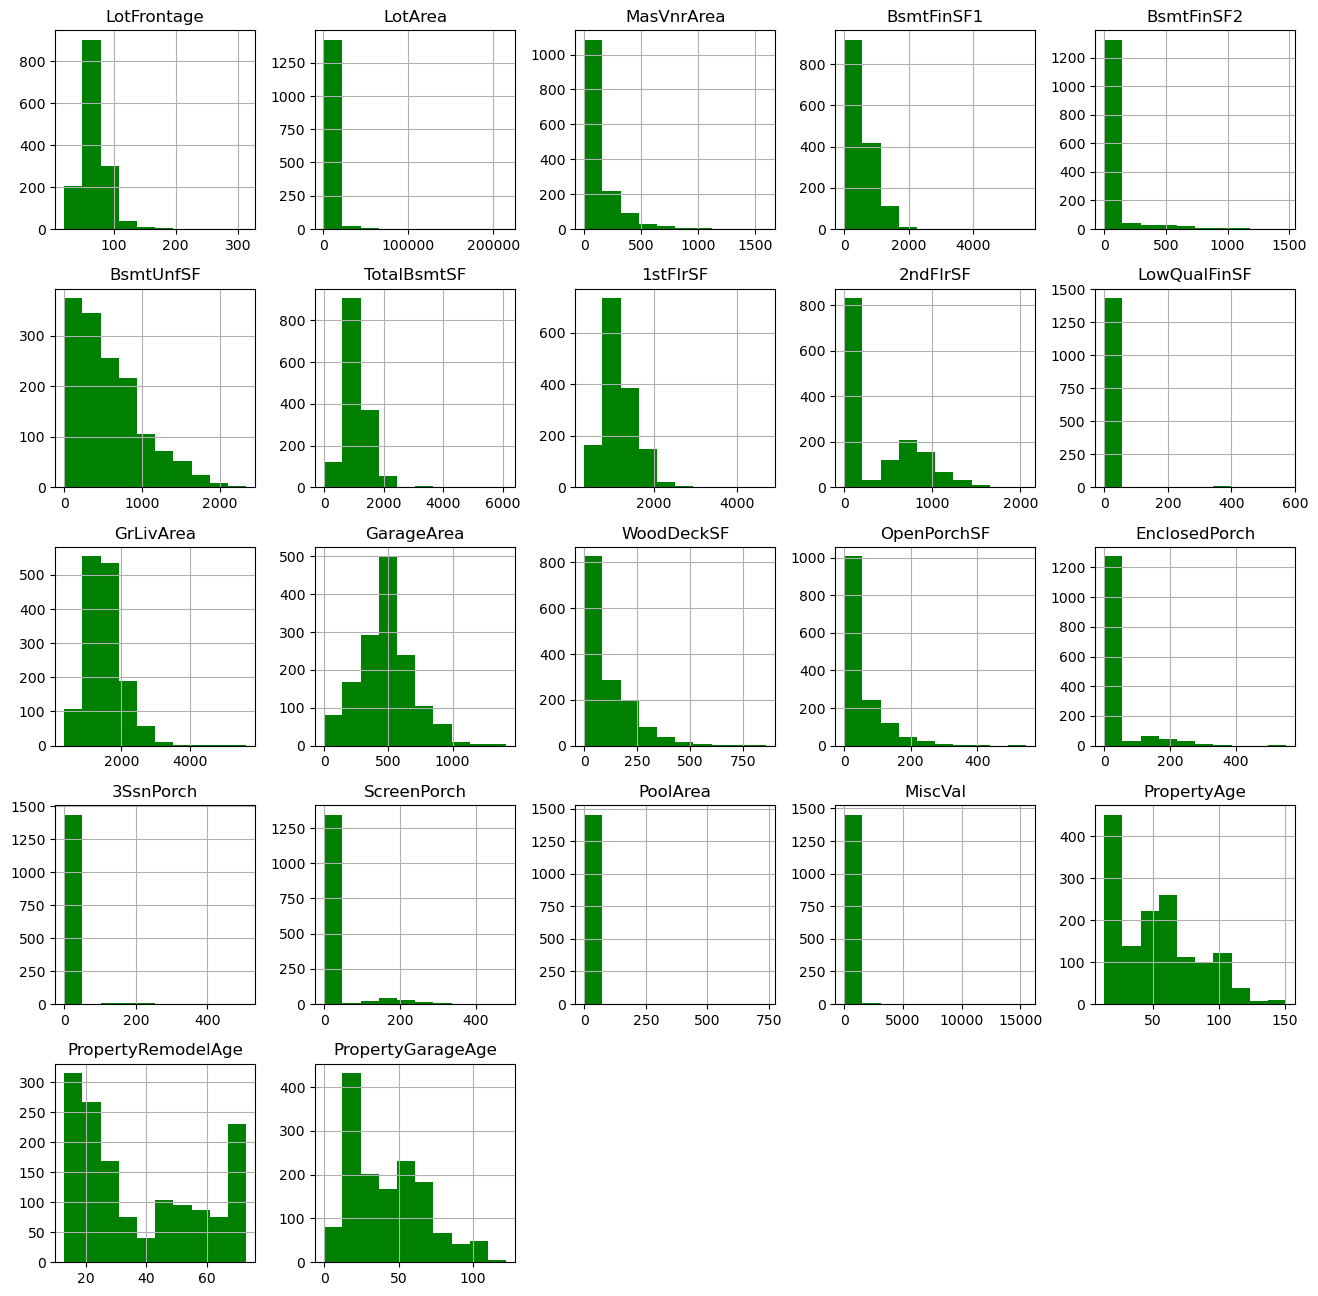

In [124]:
df[cols_quantitative].hist(layout=(5,5),figsize=(16,16),color='g')

## <font color = blue>Step3: Preparing data for Linear Regression</font>
###### Dummy column creation

In [125]:
# convert into dummies - one hot encoding
df_dummies = pd.get_dummies(df[cols_categorical], drop_first=True)
df=df.drop(cols_categorical,axis=1)
print(len(df.columns))
df=pd.concat([df,df_dummies],axis=1)
len(df.columns)

23


322

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 322 entries, LotFrontage to GarageCars_4
dtypes: float64(3), int64(20), uint8(299)
memory usage: 688.8 KB


###### Splitting Data into Training and Testing Sets
- Now we need to split the data into Train andTest data sets.
- Train data set will be used to construct the model
- Test data set will be used to validated the model.

In [127]:
np.random.seed(20)
df_train,df_test = train_test_split(df,test_size=0.3,train_size=0.7,random_state=100)

In [128]:
print(df_train.shape)
print(df_test.shape)

(1021, 322)
(438, 322)


###### Rescaling the features
- after analysing the min and max values of various features there is lot of variance. So it is extremely important to rescale the variables so that they have a comparable scale.
- There are two common ways of rescaling
1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time we will use Min-Max scaling

In [129]:
scaler= MinMaxScaler()

df_train[cols_quantitative+['SalePrice']] = scaler.fit_transform(df_train[cols_quantitative+['SalePrice']])
df_train.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropertyAge,PropertyRemodelAge,PropertyGarageAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,...,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,YrSold_2007,YrSold_2008,YrSold_2009,Yr

In [130]:
df_test.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropertyAge,PropertyRemodelAge,PropertyGarageAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,...,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,YrSold_2007,YrSold_2008,YrSold_2009,Yr

In [131]:
#scaling the test variables
df_test[cols_quantitative+['SalePrice']] = scaler.transform(df_test[cols_quantitative+['SalePrice']])
df_test.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropertyAge,PropertyRemodelAge,PropertyGarageAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,...,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,YrSold_2007,YrSold_2008,YrSold_2009,Yr

## <font color = blue>Step4: Linear Regression Model Building</font>

###### Build initial model using RFE
  

In [132]:
y_train = df_train.pop('SalePrice')
x_train=df_train

In [133]:
lm=LinearRegression()
lm.fit(x_train,y_train)

rfe=RFE(lm,n_features_to_select=100)
rfe=rfe.fit(x_train,y_train)

In [134]:
list(zip(x_train,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 46),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('GarageArea', False, 39),
 ('WoodDeckSF', False, 120),
 ('OpenPorchSF', False, 33),
 ('EnclosedPorch', False, 152),
 ('3SsnPorch', False, 32),
 ('ScreenPorch', False, 124),
 ('PoolArea', False, 6),
 ('MiscVal', False, 67),
 ('PropertyAge', True, 1),
 ('PropertyRemodelAge', False, 40),
 ('PropertyGarageAge', False, 11),
 ('MSSubClass_30', False, 161),
 ('MSSubClass_40', False, 180),
 ('MSSubClass_45', False, 65),
 ('MSSubClass_50', False, 140),
 ('MSSubClass_60', False, 61),
 ('MSSubClass_70', False, 107),
 ('MSSubClass_75', False, 5),
 ('MSSubClass_80', False, 142),
 ('MSSubClass_85', False, 77),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 123),
 ('MSSubClass_160', False, 163),
 ('MSSubClass_18

In [135]:
#variables included in the model
cols_included = x_train.columns[rfe.support_]
cols_included

Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'PropertyAge', 'MSSubClass_90', 'MSSubClass_190', 'MSZoning_RH',
       'LandSlope_Sev', 'Neighborhood_Crawfor', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'BldgType_2fmCon',
       'BldgType_Duplex', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4',
       'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8',
       'OverallQual_9', 'OverallQual_10', 'OverallCond_2', 'OverallCond_3',
       'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9', 'RoofStyle_Shed', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Exterior2nd_Other', 'ExterCond_P

###### Build model using stats model

In [136]:
# extracting x_train from the variables selected in rfe
x_train_sm =x_train[cols_included]

###### The Below mentioned function will iteratively remove the high p value variable untill it reaches where p value is <0.05 for all the variables

In [137]:
import statsmodels.api as sm

def sm_excludeHighPVariables(x_train_prev, excludedVariables):
    # excluding high p value columns for new sm
    if len(excludedVariables)>0:
        x_train_new =x_train_prev.drop(excludedVariables,axis=1)
    else:
        x_train_new =x_train_prev
    
    x_train_new = sm.add_constant(x_train_new)
    lm_sm=sm.OLS(y_train,x_train_new).fit()
    smCoefficients = lm_sm.summary2().tables[1]
    highPValueVariables = smCoefficients.loc[smCoefficients["P>|t|"]>0.05].sort_values(by=["P>|t|"],ascending=False).index
    
    if len(highPValueVariables)>0:
        print("High P Value Variables to be removed:")
        print(highPValueVariables)
        return sm_excludeHighPVariables(x_train_new, highPValueVariables.tolist())
    else:
        print("No High P Value Variables to be removed")
        return x_train_new
        
x_train_final = sm_excludeHighPVariables(x_train_sm,[])
print(x_train_final.columns)
print(len(x_train_final.columns))

High P Value Variables to be removed:
Index(['GarageCond_Po', 'Exterior2nd_AsphShn', 'Exterior1st_AsphShn',
       'OverallCond_9', 'GarageCond_TA', 'GarageQual_Fa', 'GarageCond_Fa',
       'GarageQual_TA', 'BldgType_2fmCon', 'MSSubClass_190', 'GarageCond_Gd',
       'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'GarageQual_Gd',
       'GarageQual_Po', 'MSZoning_RH', 'MSSubClass_90', 'BldgType_Duplex',
       'Foundation_Stone', 'LowQualFinSF'],
      dtype='object')
High P Value Variables to be removed:
Index(['GrLivArea', 'Exterior2nd_Other', 'ExterCond_Po', 'OverallCond_8'], dtype='object')
No High P Value Variables to be removed
Index(['const', 'LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'PropertyAge',
       'LandSlope_Sev', 'Neighborhood_Crawfor', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'OverallQual_2', 'OverallQual_3',
       'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_

###### The Below mentioned function will iteratively remove the top VIF variable untill it reached the VIF < 5

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def sm_excludeHighVIFVariables(x_train_prev, excludedVariables):
    # excluding high VIF value columns for new sm
    if len(excludedVariables)>0:
        x_train_new =x_train_prev.drop(excludedVariables,axis=1)
    else:
        x_train_new =x_train_prev
        
    # running stats model after excluding top VIF variable
    x_train_new = sm.add_constant(x_train_new)
    lm_sm=sm.OLS(y_train,x_train_new).fit()
    
    #Calculating VIF on new model
    x_train_new= x_train_new.drop(['const'],axis=1)
    vif = pd.DataFrame()    
    vif['Features']=x_train_new.columns
    vif['VIF'] = [variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF',ascending=False)    
    if (vif.iloc[0,1] < 5):
        print("No VIF to exclude")
        #Returning x train with no more high VIFs
        return x_train_new
    else:
        print(f"variable to be excluded:{vif.iloc[0,0]}")
        return sm_excludeHighVIFVariables(x_train_new,[vif.iloc[0,0]])
        
x_train_VIFfinal = sm_excludeHighVIFVariables(x_train_final,[])
print(x_train_VIFfinal.columns)
print(len(x_train_VIFfinal.columns))

variable to be excluded:BsmtQual_NA
variable to be excluded:GarageCars_4
variable to be excluded:TotRmsAbvGrd_9
variable to be excluded:OverallQual_6
variable to be excluded:KitchenAbvGr_1
variable to be excluded:BedroomAbvGr_8
variable to be excluded:SaleCondition_Partial
variable to be excluded:BsmtCond_NA
variable to be excluded:GarageType_NA
variable to be excluded:GarageQual_NA
variable to be excluded:BsmtFinSF1
variable to be excluded:GarageCond_NA
variable to be excluded:FireplaceQu_NA
variable to be excluded:RoofMatl_CompShg
variable to be excluded:TotalBsmtSF
variable to be excluded:GarageCars_2
variable to be excluded:BsmtFinType1_NA
variable to be excluded:1stFlrSF
variable to be excluded:OverallCond_5
variable to be excluded:LotFrontage
variable to be excluded:PropertyAge
No VIF to exclude
Index(['LotArea', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'OverallQual_2', '

##### Final inspection of VIF values

In [139]:
x_train_vif = x_train_VIFfinal#.drop(['const'],axis=1)
#calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x=x_train_vif
vif['Features']=x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,LotArea,3.27
2,BsmtUnfSF,3.27
22,RoofStyle_Shed,3.26
4,LandSlope_Sev,2.88
8,Condition2_RRAe,2.82
43,TotRmsAbvGrd_6,2.64
44,TotRmsAbvGrd_7,2.58
50,Fireplaces_1,2.55
12,OverallQual_5,2.45
3,2ndFlrSF,2.33


###### Calculating Metrics for Linear regression model

In [140]:
x_train_VIFfinal = sm.add_constant(x_train_VIFfinal)
lm_sm=sm.OLS(y_train,x_train_VIFfinal).fit()

In [141]:
LinearRegressionModel = lm_sm.summary2().tables[1]
LinearRegressionModel = LinearRegressionModel.iloc[:,[0]]
LinearRegressionModel = LinearRegressionModel.reset_index(names=['Feature'])
LinearRegressionModel = LinearRegressionModel.loc[(LinearRegressionModel['Coef.']!=0) | (LinearRegressionModel['Feature']== 'const')]
LinearRegressionModel

,Feature,Coef.
0,const,2.023982e-01
1,LotArea,2.503533e-01
2,BsmtFinSF2,2.887117e-02
3,BsmtUnfSF,-2.976529e-02
4,2ndFlrSF,5.453230e-03
5,LandSlope_Sev,-4.326539e-02
6,Neighborhood_Crawfor,2.562111e-02
7,Condition2_PosA,-1.207436e-01
8,Condition2_PosN,-4.267908e-01
9,Condition2_RRAe,-1.327676e-01


In [142]:
#Calaculating R2 for train and test datasets
selectedColumns = x_train_VIFfinal.columns.drop('const')
y_test = df_test['SalePrice']
#only the columns selected after RFE need to be considered for x_test
x_test=df_test[selectedColumns]
x_test_sm = sm.add_constant(x_test)

y_pred_train = lm_sm.predict(x_train_VIFfinal)
y_pred_test = lm_sm.predict(x_test_sm)

metric = []

r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train R2 score:{r2_train_lr}")
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test R2 score:{r2_test_lr}")
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS:{rss1_lr}")
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS:{rss2_lr}")
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE:{mse_train_lr}")
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE:{mse_test_lr}")
metric.append(mse_test_lr**0.5)


metric.append(len(LinearRegressionModel))

Train R2 score:0.8176613284592761
Test R2 score:0.7965818471815029
Train RSS:2.2436825421976057
Test RSS:1.1057447105602745
Train MSE:0.002197534321447214
Test MSE:0.0025245313026490282


## <font color="blue">Step5: Ridge and Lasso Regression</font>
In the model built using simple linear regression the R2 of the test data is not good. Hence we need to try different prediction to build a good model. Lets try Ridge and Lasso regressions

## Ridge Regression

In [143]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge=Ridge()

#cross validation
folds=5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train_VIFfinal, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [144]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.3}


In [145]:
#Fitting Ridge model for best alpha and printing coefficients which have been penalised
alpha = 0.3
ridge = Ridge(alpha=alpha)

ridge.fit(x_train_VIFfinal, y_train)


Ridge(alpha=0.3)

In [146]:
ridgeModel = pd.DataFrame()
ridgeModel["Feature"] = ridge.feature_names_in_
ridgeModel["Coefficient"] = ridge.coef_
ridgeModel = ridgeModel.loc[(ridgeModel['Coefficient']!=0) | (ridgeModel['Feature']== 'const')]
ridgeModel

,Feature,Coefficient
0,const,0.000000
1,LotArea,0.190992
2,BsmtFinSF2,0.027733
3,BsmtUnfSF,-0.029160
4,2ndFlrSF,0.005045
5,LandSlope_Sev,-0.014592
6,Neighborhood_Crawfor,0.025832
7,Condition2_PosA,-0.076252
8,Condition2_PosN,-0.296959
9,Condition2_RRAe,-0.042162


##### Calculating Metrics for Ridge regression model

In [147]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge.predict(x_train_VIFfinal)
y_pred_test = ridge.predict(x_test_sm)

metric2 = []

r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train R2 score:{r2_train_lr}")
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test R2 score:{r2_test_lr}")
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS:{rss1_lr}")
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS:{rss2_lr}")
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE:{mse_train_lr}")
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE:{mse_test_lr}")
metric2.append(mse_test_lr**0.5)

metric2.append(len(ridgeModel))

Train R2 score:0.8157482057324742
Test R2 score:0.8013385396332728
Train RSS:2.2672235717934486
Test RSS:1.0798881808188034
Train MSE:0.0022205911574862377
Test MSE:0.0024654981297232955


## Lasso Regression

In [148]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train_VIFfinal, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [149]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [150]:
#Fitting lasso model for best alpha and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(x_train_VIFfinal, y_train) 

lasso.coef_

array([ 0.        ,  0.16896948,  0.02145865, -0.0228453 ,  0.01146454,
       -0.        ,  0.02314462, -0.        , -0.28037922,  0.        ,
       -0.02617782, -0.03211732, -0.028052  , -0.01481912,  0.0415072 ,
        0.10880922,  0.18253551,  0.27818321, -0.        , -0.03344808,
       -0.01564469, -0.        ,  0.00623095,  0.0143852 ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.10081406,
       -0.        , -0.01940313,  0.        ,  0.        ,  0.        ,
       -0.        , -0.03767569,  0.0086977 ,  0.02889634, -0.03039031,
       -0.        , -0.04253849, -0.04953143, -0.03574948, -0.0265267 ,
       -0.01692247, -0.00153329,  0.04333499, -0.00172469,  0.00406391,
        0.        ,  0.01923332,  0.04367254, -0.0049452 , -0.03217799,
        0.0492414 ])

In [151]:
lassoModel = pd.DataFrame()
lassoModel["Feature"] = lasso.feature_names_in_
lassoModel["Coefficient"] = lasso.coef_
lassoModel = lassoModel.loc[(lassoModel['Coefficient']!=0) | (lassoModel['Feature']== 'const')]
lassoModel

,Feature,Coefficient
0,const,0.000000
1,LotArea,0.168969
2,BsmtFinSF2,0.021459
3,BsmtUnfSF,-0.022845
4,2ndFlrSF,0.011465
6,Neighborhood_Crawfor,0.023145
8,Condition2_PosN,-0.280379
10,OverallQual_2,-0.026178
11,OverallQual_3,-0.032117
12,OverallQual_4,-0.028052


###### Calculating Metrics for Lasso regression model

In [152]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(x_train_VIFfinal)
y_pred_test = lasso.predict(x_test_sm)

metric3 = []

r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train R2 score:{r2_train_lr}")
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test R2 score:{r2_test_lr}")
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS:{rss1_lr}")
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS:{rss2_lr}")
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE:{mse_train_lr}")
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE:{mse_test_lr}")
metric3.append(mse_test_lr**0.5)

metric3.append(len(lassoModel))

Train R2 score:0.8087436171087611
Test R2 score:0.7991789471399458
Train RSS:2.3534152341407912
Test RSS:1.0916273395092908
Train MSE:0.0023050100236442616
Test MSE:0.002492299861893358


In [153]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)','No Of Variables'], 
        'Linear Regression': metric
        }
lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

## <font color="blue">Conclusion</font>

###### Comparing metrics of linear Ridge and Lasso Regressions

In [154]:
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.817661,0.815748,0.808744
1,R2 Score (Test),0.796582,0.801339,0.799179
2,RSS (Train),2.243683,2.267224,2.353415
3,RSS (Test),1.105745,1.079888,1.091627
4,MSE (Train),0.046878,0.047123,0.048011
5,MSE (Test),0.050245,0.049654,0.049923
6,No Of Variables,56.000000,54.000000,39.000000


- The R Square test of both  Ridge and lasso regressions are better than Linear regression
- All the metrics of Lasso and Ridge regressions are same
- Lasso regression has less variables compared to Ridge regression.
- Hence selecting Lasso Regression as final regression.
- ##### Alpha for Ridge regression is 0.3 and Alpha for Lasso regression is 0.0001
### <font color="red">Final Model is Lasso regression with 39 independent variables. Even though Ridge R2 is marginally better than Lasso I have selected Lasso the model is less comaplex with 39 variables as compared to ridge with 54 variables</font>
### <font color="red">Following are the top 10 significant variables in predicting the House price from Lasso Regression</font>

In [155]:
lassoModel["AbsCoef"] = abs(lassoModel["Coefficient"])
top10Variables = lassoModel.sort_values('AbsCoef', ascending=False).iloc[0:10,:]
top10Variables

,Feature,Coefficient,AbsCoef
8,Condition2_PosN,-0.280379,0.280379
17,OverallQual_10,0.278183,0.278183
16,OverallQual_9,0.182536,0.182536
1,LotArea,0.168969,0.168969
15,OverallQual_8,0.108809,0.108809
29,RoofMatl_WdShngl,0.100814,0.100814
42,TotRmsAbvGrd_4,-0.049531,0.049531
55,GarageCars_3,0.049241,0.049241
52,Fireplaces_2,0.043673,0.043673
47,TotRmsAbvGrd_10,0.043335,0.043335


## <font color="blue">Assignment Part-II</font>
- Calaculating Ridge and Lasso regression metrics with double the value of alpha

In [156]:
#Fitting Ridge model for alpha = 0.6 and printing coefficients which have been penalised
ridgeAlpha2 = 0.6
ridge2 = Ridge(alpha=ridgeAlpha2)
ridge2.fit(x_train_VIFfinal, y_train)

Ridge(alpha=0.6)

In [157]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge2.predict(x_train_VIFfinal)
y_pred_test = ridge2.predict(x_test_sm)
metricRidge2 = []

r2_train_lr = r2_score(y_train, y_pred_train)
metricRidge2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metricRidge2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metricRidge2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metricRidge2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metricRidge2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metricRidge2.append(mse_test_lr**0.5)

metricRidge2.append('Not calculated')

# Comparing ridge metrics with 0.3 and 0.6 alphas
ridgeComparision_metric = pd.DataFrame()
ridgeComparision_metric['Metric'] = ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)','No Of variables']
ridgeComparision_metric['Ridge Alpha-0.3'] = metric2
ridgeComparision_metric['Ridge Alpha-0.6'] = metricRidge2
ridgeComparision_metric

,Metric,Ridge Alpha-0.3,Ridge Alpha-0.6
0,R2 Score (Train),0.815748,0.813152
1,R2 Score (Test),0.801339,0.801875
2,RSS (Train),2.267224,2.299168
3,RSS (Test),1.079888,1.076971
4,MSE (Train),0.047123,0.047454
5,MSE (Test),0.049654,0.049587
6,No Of variables,54.000000,Not calculated


In [158]:
#Fitting lasso model for alpha = 0.0001 and printing coefficients which have been penalised
lassoAlpha2 =0.0002
lasso2 = Lasso(alpha=lassoAlpha2)        
lasso2.fit(x_train_VIFfinal, y_train) 

Lasso(alpha=0.0002)

In [159]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso2.predict(x_train_VIFfinal)
y_pred_test = lasso2.predict(x_test_sm)
metricLasso2 = []

r2_train_lr = r2_score(y_train, y_pred_train)
metricLasso2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metricLasso2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metricLasso2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metricLasso2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metricLasso2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metricLasso2.append(mse_test_lr**0.5)

metricLasso2.append('Not calculated')

# Comparing ridge metrics with 0.3 and 0.6 alphas
lassoComparision_metric = pd.DataFrame()
lassoComparision_metric['Metric'] = ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)','No Of variables']
lassoComparision_metric['Lasso Alpha-0.0001'] = metric3
lassoComparision_metric['Lasso Alpha-0.0002'] = metricLasso2
lassoComparision_metric

,Metric,Lasso Alpha-0.0001,Lasso Alpha-0.0002
0,R2 Score (Train),0.808744,0.801297
1,R2 Score (Test),0.799179,0.800867
2,RSS (Train),2.353415,2.445047
3,RSS (Test),1.091627,1.082453
4,MSE (Train),0.048011,0.048936
5,MSE (Test),0.049923,0.049713
6,No Of variables,39.000000,Not calculated


In [160]:
lassoModel2 = pd.DataFrame()
lassoModel2["Feature"] = lasso2.feature_names_in_
lassoModel2["Coefficient"] = lasso2.coef_
lassoModel2 = lassoModel.loc[(lassoModel['Coefficient']!=0) | (lassoModel['Feature']== 'const')]

lassoModel2["AbsCoef"] = abs(lassoModel2["Coefficient"])
top10Variables2 = lassoModel2.sort_values('AbsCoef', ascending=False).iloc[0:10,:]
top10Variables2

,Feature,Coefficient,AbsCoef
8,Condition2_PosN,-0.280379,0.280379
17,OverallQual_10,0.278183,0.278183
16,OverallQual_9,0.182536,0.182536
1,LotArea,0.168969,0.168969
15,OverallQual_8,0.108809,0.108809
29,RoofMatl_WdShngl,0.100814,0.100814
42,TotRmsAbvGrd_4,-0.049531,0.049531
55,GarageCars_3,0.049241,0.049241
52,Fireplaces_2,0.043673,0.043673
47,TotRmsAbvGrd_10,0.043335,0.043335


- ###### Remove top 5 variables from Lasso and rebuild the model

In [161]:
 lasso_top5Features=lassoModel2.sort_values('AbsCoef', ascending=False).iloc[0:5,:]["Feature"].tolist()
x_train_NoTop5 = x_train_VIFfinal.drop(lasso_top5Features,axis=1)

In [162]:
lasso_top5Features

['Condition2_PosN',
 'OverallQual_10',
 'OverallQual_9',
 'LotArea',
 'OverallQual_8']

In [163]:
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(x_train_NoTop5, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [164]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [165]:
#Fitting lasso model for best alpha and printing coefficients which have been penalised
alpha =0.0001
lasso_NoTop5 = Lasso(alpha=alpha)        
lasso_NoTop5.fit(x_train_NoTop5, y_train) 

Lasso(alpha=0.0001)

In [166]:
lassoModel_NoTop5 = pd.DataFrame()
lassoModel_NoTop5["Feature"] = lasso_NoTop5.feature_names_in_
lassoModel_NoTop5["Coefficient"] = lasso_NoTop5.coef_
lassoModel_NoTop5 = lassoModel_NoTop5.loc[(lassoModel_NoTop5['Coefficient']!=0) | (lassoModel_NoTop5['Feature']== 'const')]

lassoModel_NoTop5["AbsCoef"] = abs(lassoModel_NoTop5["Coefficient"])
top5Variables = lassoModel_NoTop5.sort_values('AbsCoef', ascending=False).iloc[0:5,:]
top5Variables

,Feature,Coefficient,AbsCoef
24,RoofMatl_WdShngl,0.167012,0.167012
50,GarageCars_3,0.111349,0.111349
42,TotRmsAbvGrd_10,0.080597,0.080597
36,TotRmsAbvGrd_3,-0.076111,0.076111
37,TotRmsAbvGrd_4,-0.070767,0.070767
